http://r-statistics.co/Complete-Ggplot2-Tutorial-Part1-With-R-Code.html

1. Understanding the Ggplot Syntax

The syntax for constructing ggplots could be puzzling if you are a beginner or work primarily with base graphics. The main difference is that, unlike base graphics, ggplot works with dataframes and not individual vectors. All the data needed to make the plot is typically be contained within the dataframe supplied to the ggplot() itself or can be supplied to respective geoms. More on that later.

The second noticeable feature is that you can keep enhancing the plot by adding more layers (and themes) to an existing plot created using the ggplot() function.
Let’s initialize a basic ggplot based on the midwest dataset.

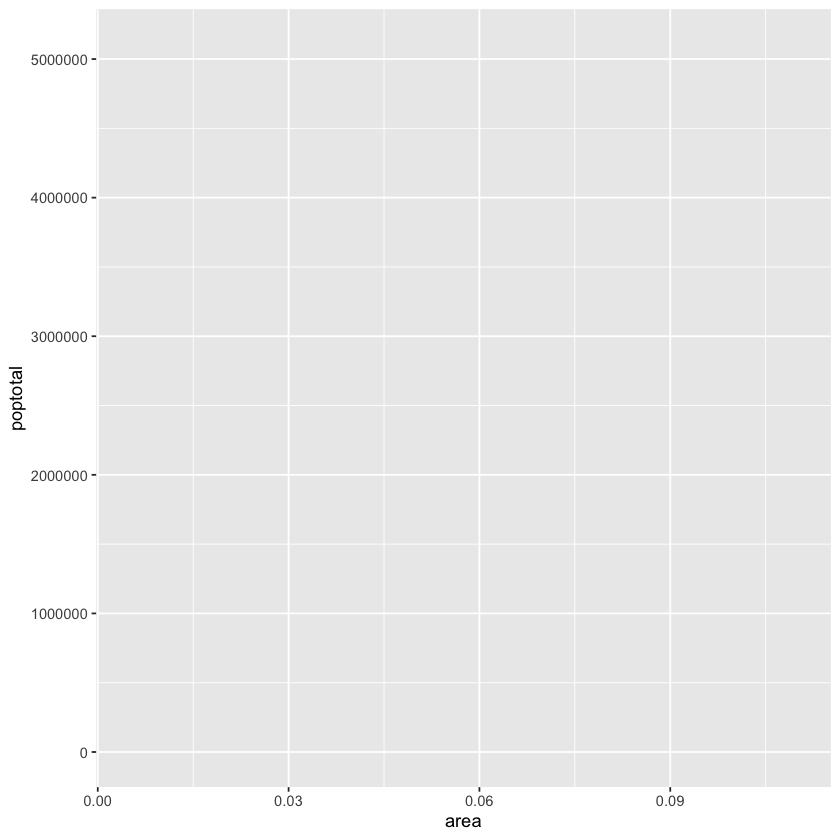

In [1]:
# Setup
options(scipen=999)  # turn off scientific notation like 1e+06
library(ggplot2)
data("midwest", package = "ggplot2")  # load the data
# midwest <- read.csv("http://goo.gl/G1K41K") # alt source 

# Init Ggplot
ggplot(midwest, aes(x=area, y=poptotal))  # area and poptotal are columns in 'midwest'

A blank ggplot is drawn. Even though the x and y are specified, there are no points or lines in it. This is because, ggplot doesn’t assume that you meant a scatterplot or a line chart to be drawn. I have only told ggplot what dataset to use and what columns should be used for X and Y axis. I haven’t explicitly asked it to draw any points.

Also note that aes() function is used to specify the X and Y axes. That’s because, any information that is part of the source dataframe has to be specified inside the aes() function.

 2. How to Make a Simple Scatterplot

Let’s make a scatterplot on top of the blank ggplot by adding points using a geom layer called geom_point.

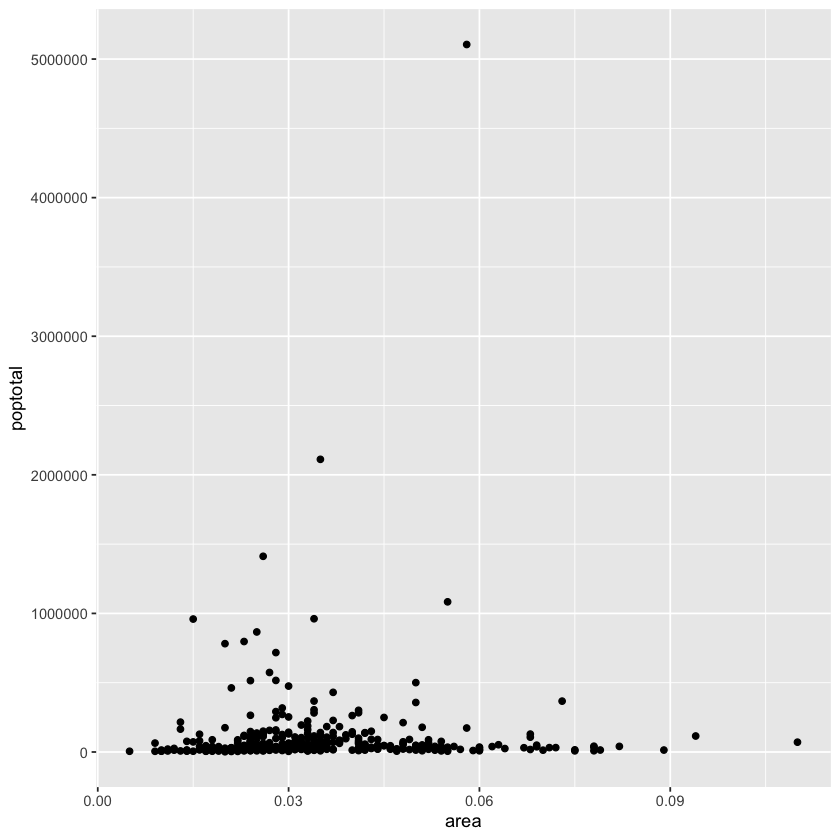

In [2]:

ggplot(midwest, aes(x=area, y=poptotal)) + geom_point()

We got a basic scatterplot, where each point represents a county. However, it lacks some basic components such as the plot title, meaningful axis labels etc. Moreover most of the points are concentrated on the bottom portion of the plot, which is not so nice. You will see how to rectify these in upcoming steps.

Like geom_point(), there are many such geom layers which we will see in a subsequent part in this tutorial series. For now, let’s just add a smoothing layer using geom_smooth(method='lm'). Since the method is set as lm (short for linear model), it draws the line of best fit.

`geom_smooth()` using formula 'y ~ x'



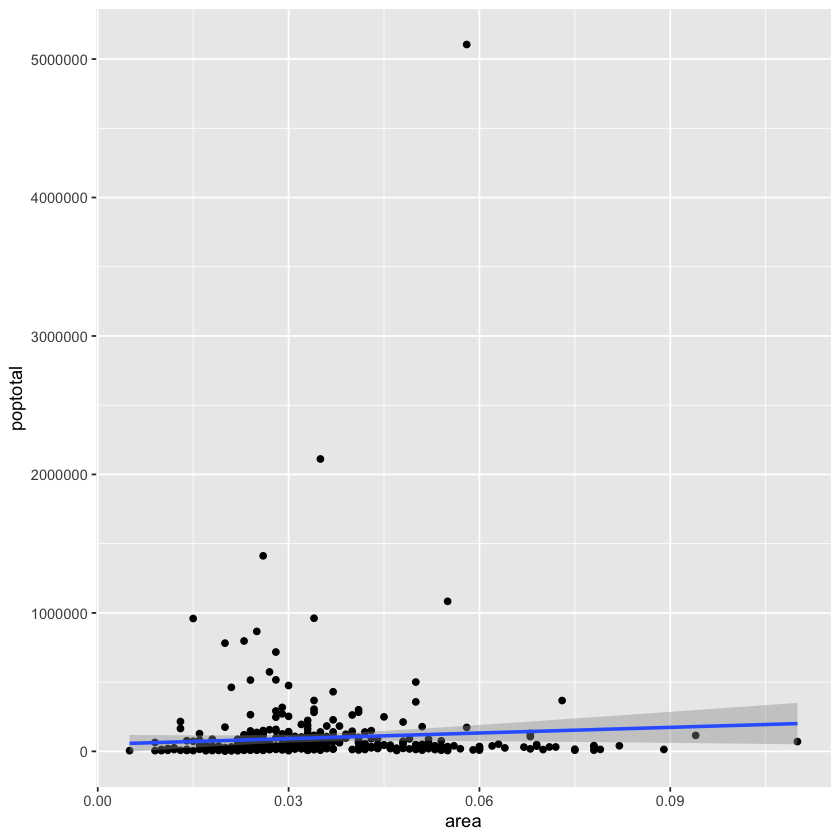

In [3]:
 # set se=FALSE to turnoff confidence bands
g <- ggplot(midwest, aes(x=area, y=poptotal)) + geom_point() + geom_smooth(method="lm") 
plot(g)

#### Ggplot Scatterplot

The line of best fit is in blue. Can you find out what other method options are available for geom_smooth? (note: see ?geom_smooth). You might have noticed that majority of points lie in the bottom of the chart which doesn’t really look nice. So, let’s change the Y-axis limits to focus on the lower half.

 3. Adjusting the X and Y axis limits

The X and Y axis limits can be controlled in 2 ways.

Method 1: By deleting the points outside the range

This will change the lines of best fit or smoothing lines as compared to the original data.

This can be done by xlim() and ylim(). You can pass a numeric vector of length 2 (with max and min values) or just the max and min values itself.

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 5 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 5 rows containing missing values (geom_point).”


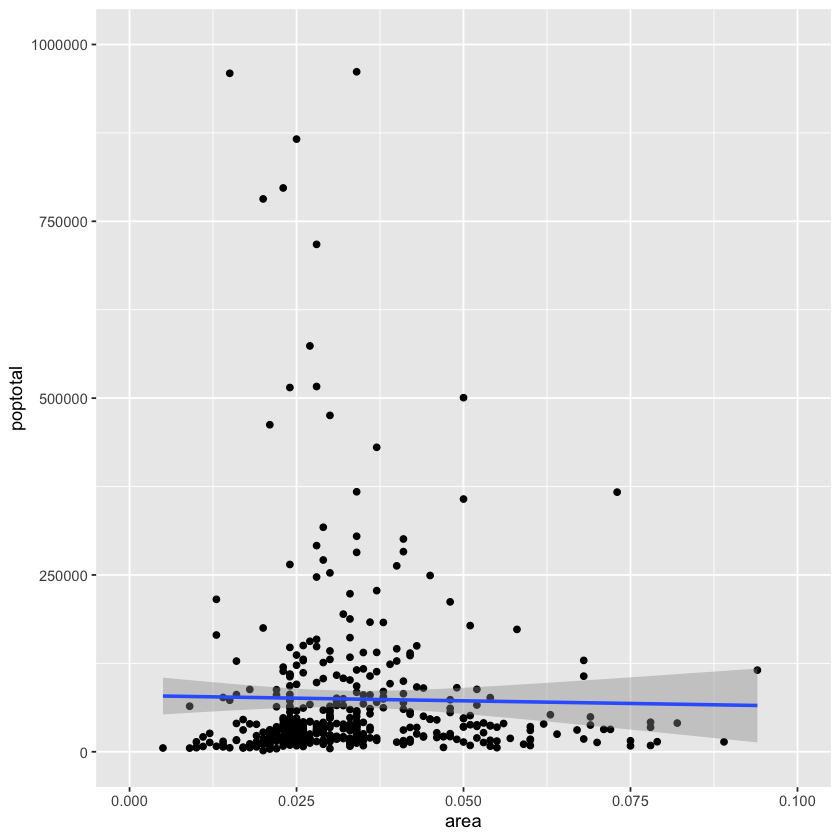

In [4]:
g <- ggplot(midwest, aes(x=area, y=poptotal)) + geom_point() + geom_smooth(method="lm")  
# set se=FALSE to turnoff confidence bands

# Delete the points outside the limits
g + xlim(c(0, 0.1)) + ylim(c(0, 1000000))   # deletes points
# g + xlim(0, 0.1) + ylim(0, 1000000)   # deletes points


In this case, the chart was not built from scratch but rather was built on top of g. This is because, the previous plot was stored as g, a ggplot object, which when called will reproduce the original plot. Using ggplot, you can add more layers, themes and other settings on top of this plot.

Did you notice that the line of best fit became more horizontal compared to the original plot? This is because, when using xlim() and ylim(), the points outside the specified range are deleted and will not be considered while drawing the line of best fit (using geom_smooth(method='lm')). This feature might come in handy when you wish to know how the line of best fit would change when some extreme values (or outliers) are removed.

Method 2: Zooming In

The other method is to change the X and Y axis limits by zooming in to the region of interest without deleting the points. This is done using coord_cartesian().

Let’s store this plot as g1.

`geom_smooth()` using formula 'y ~ x'



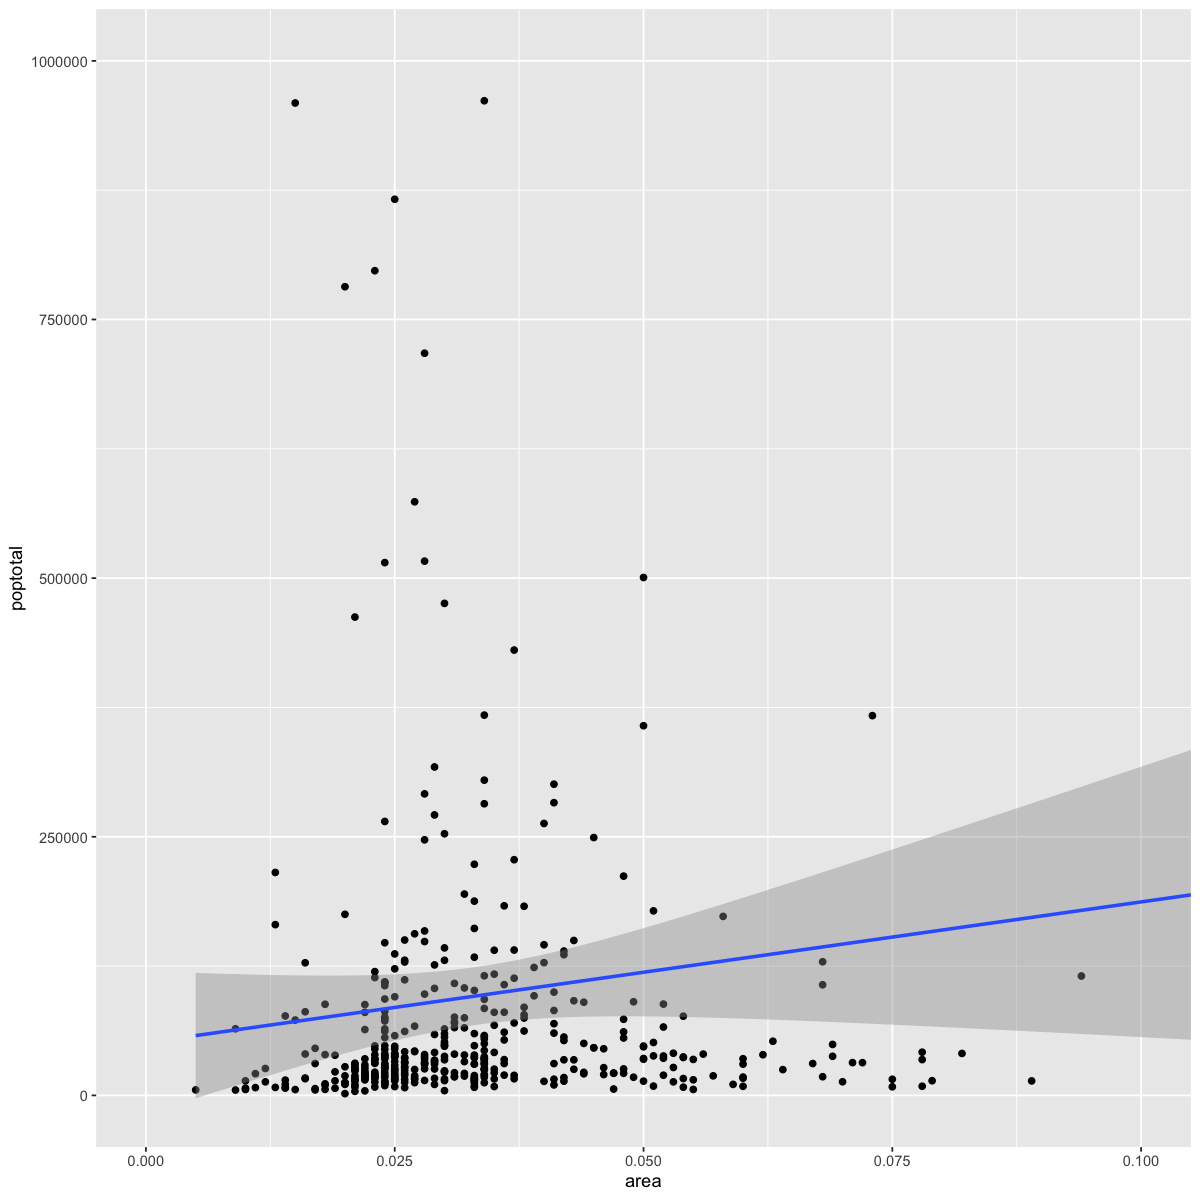

In [18]:
options(repr.plot.width=10,repr.plot.height=10)# set se=FALSE to turnoff confidence bands
g <- ggplot(midwest, aes(x=area, y=poptotal)) + geom_point() + geom_smooth(method="lm")  
# Zoom in without deleting the points outside the limits. 
# As a result, the line of best fit is the same as the original plot.
g1 <- g + coord_cartesian(xlim=c(0,0.1), ylim=c(0, 1000000))  # zooms in
plot(g1)

Since all points were considered, the line of best fit did not change.

4. How to Change the Title and Axis Labels

I have stored this as g1. Let’s add the plot title and labels for X and Y axis. This can be done in one go using the labs() function with title, x and y arguments. Another option is to use the ggtitle(), xlab() and ylab().

`geom_smooth()` using formula 'y ~ x'



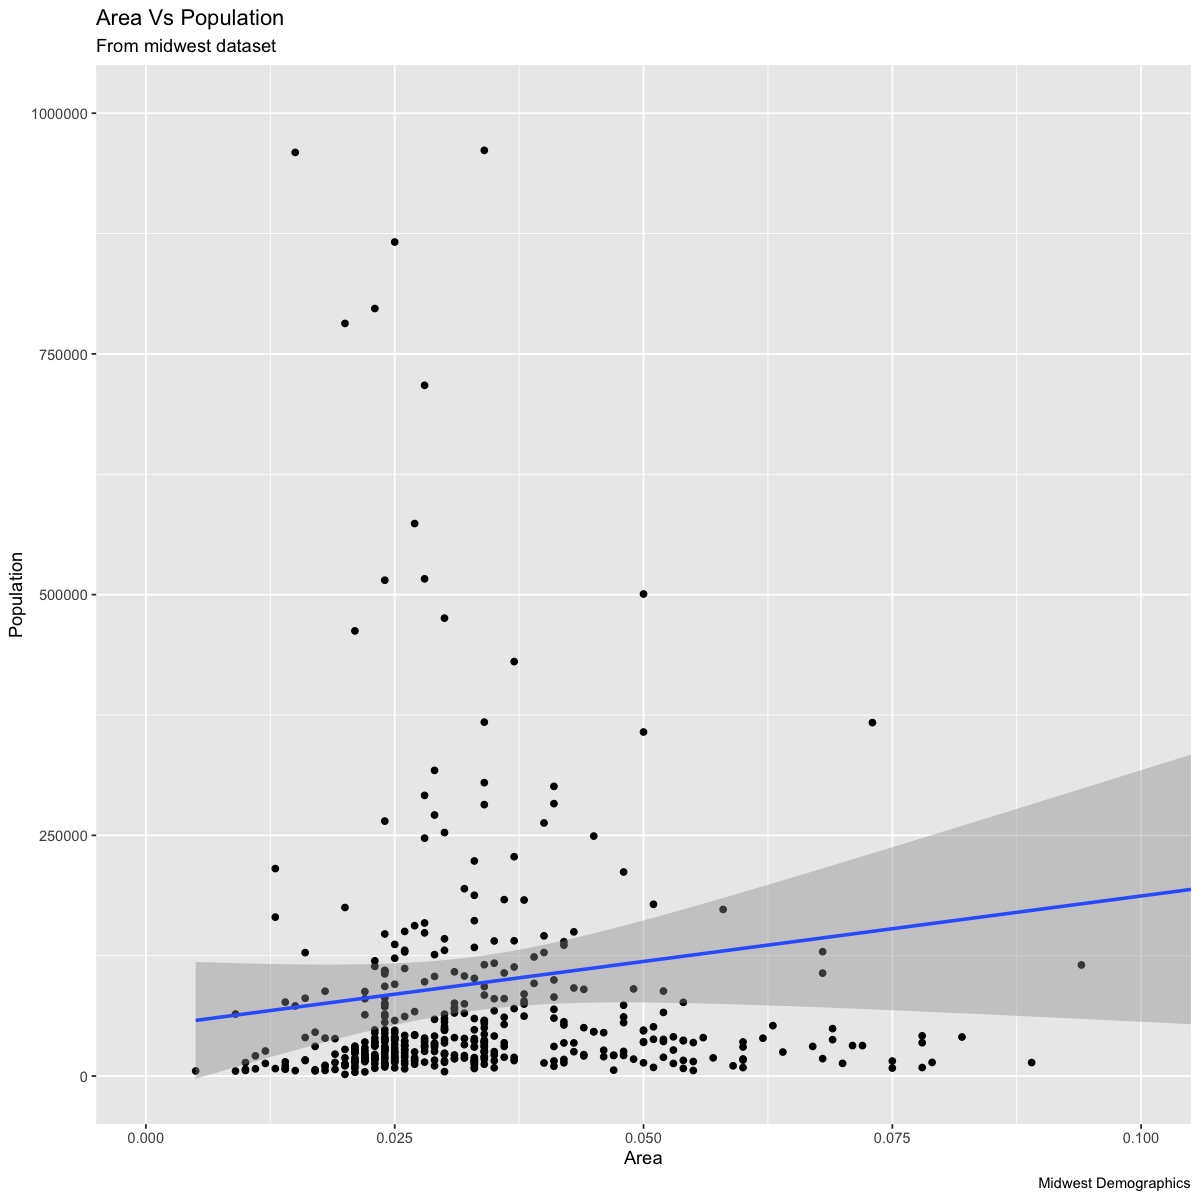

In [19]:
g <- ggplot(midwest, aes(x=area, y=poptotal)) + geom_point() + geom_smooth(method="lm")  
# set se=FALSE to turnoff confidence bands

g1 <- g + coord_cartesian(xlim=c(0,0.1), ylim=c(0, 1000000))  # zooms in

# Add Title and Labels
g1 + labs(
    title="Area Vs Population", 
    subtitle="From midwest dataset", 
    y="Population", x="Area", 
    caption="Midwest Demographics"
)


`geom_smooth()` using formula 'y ~ x'



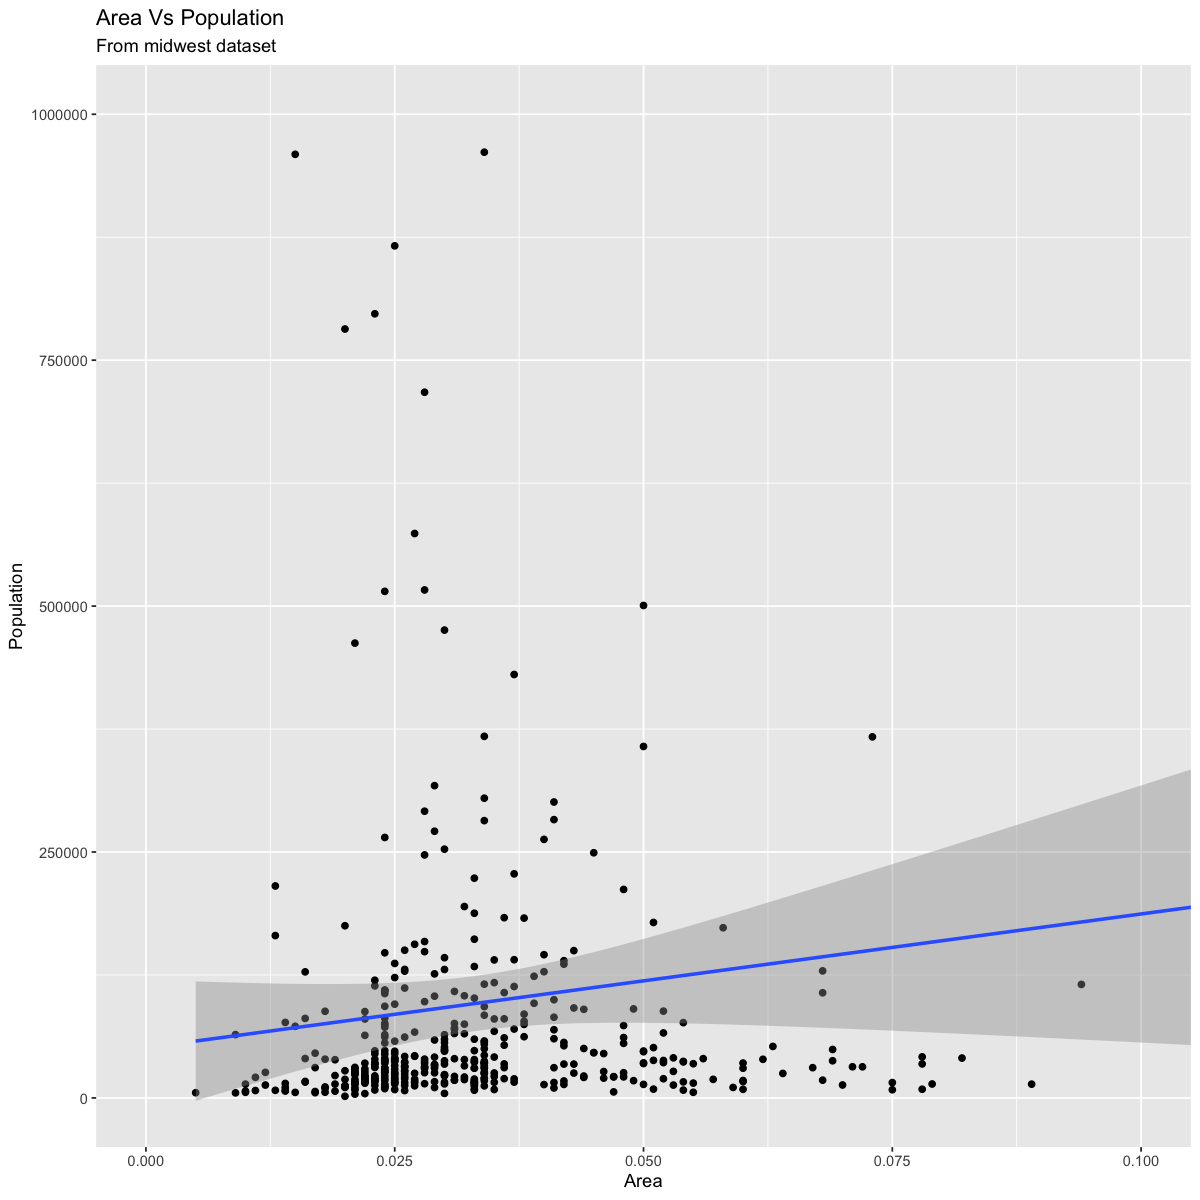

In [20]:
# or

g1 + ggtitle("Area Vs Population", subtitle="From midwest dataset") + xlab("Area") + ylab("Population")


`geom_smooth()` using formula 'y ~ x'



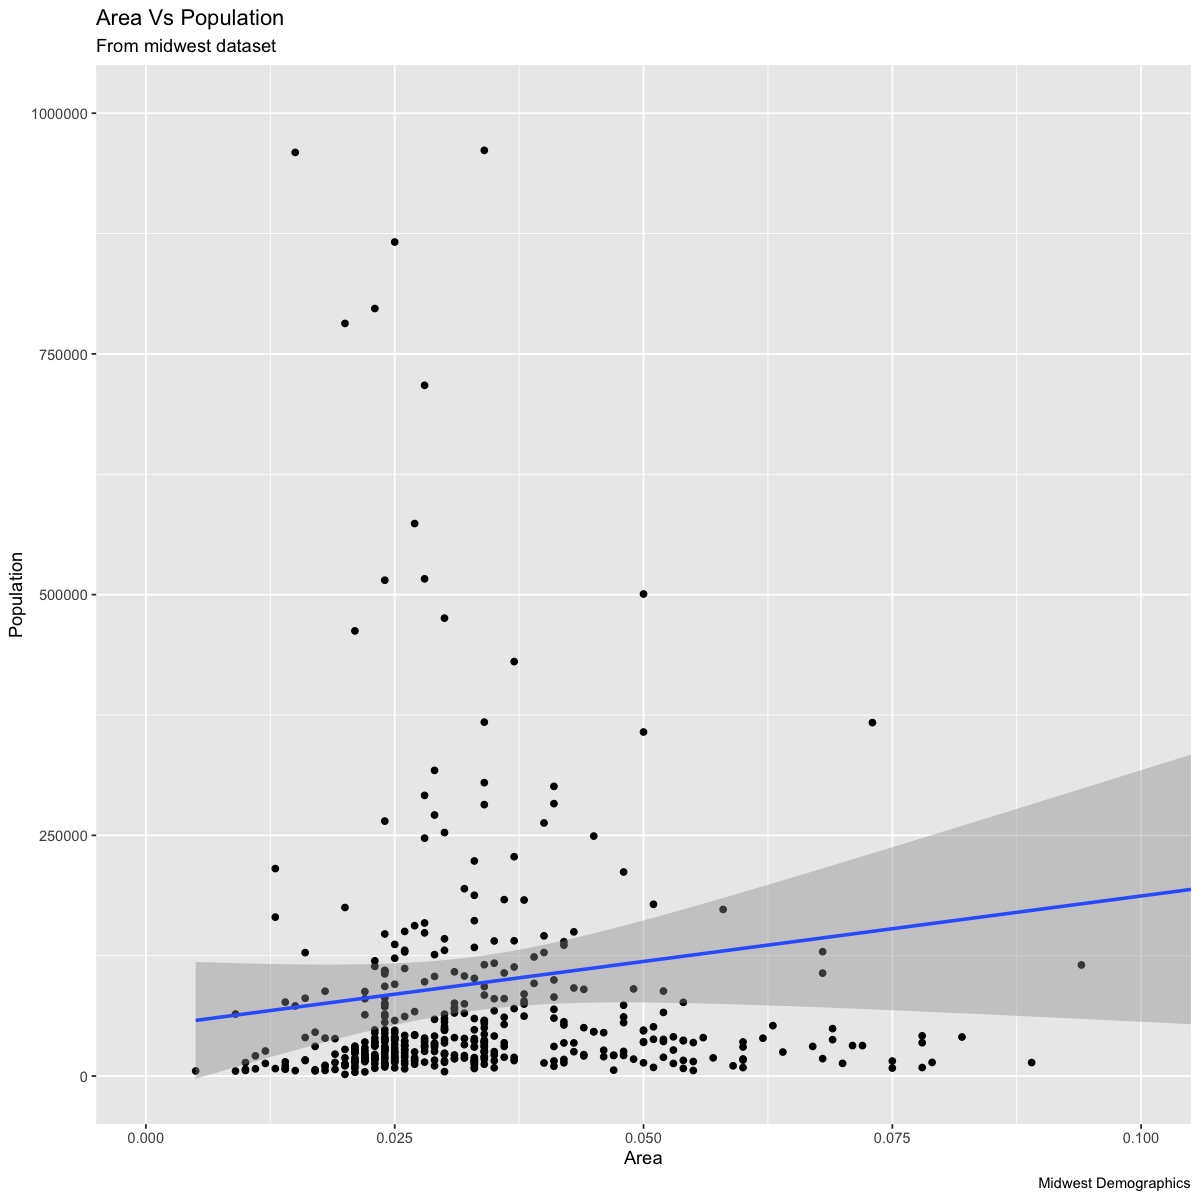

In [21]:
# Full Plot call

ggplot(
    midwest, 
    aes(
        x=area, 
        y=poptotal
    )
) +
geom_point() +   
geom_smooth(
    method="lm"
) +
coord_cartesian(
    xlim=c(0,0.1), 
    ylim=c(0, 1000000)
) + 
labs(
    title="Area Vs Population", 
    subtitle="From midwest dataset", 
    y="Population", 
    x="Area", 
    caption="Midwest Demographics"
)

5. How to Change the Color and Size of Points

How to Change the Color and Size To Static?

We can change the aesthetics of a geom layer by modifying the respective geoms. Let’s change the color of the points and the line to a static value.

`geom_smooth()` using formula 'y ~ x'



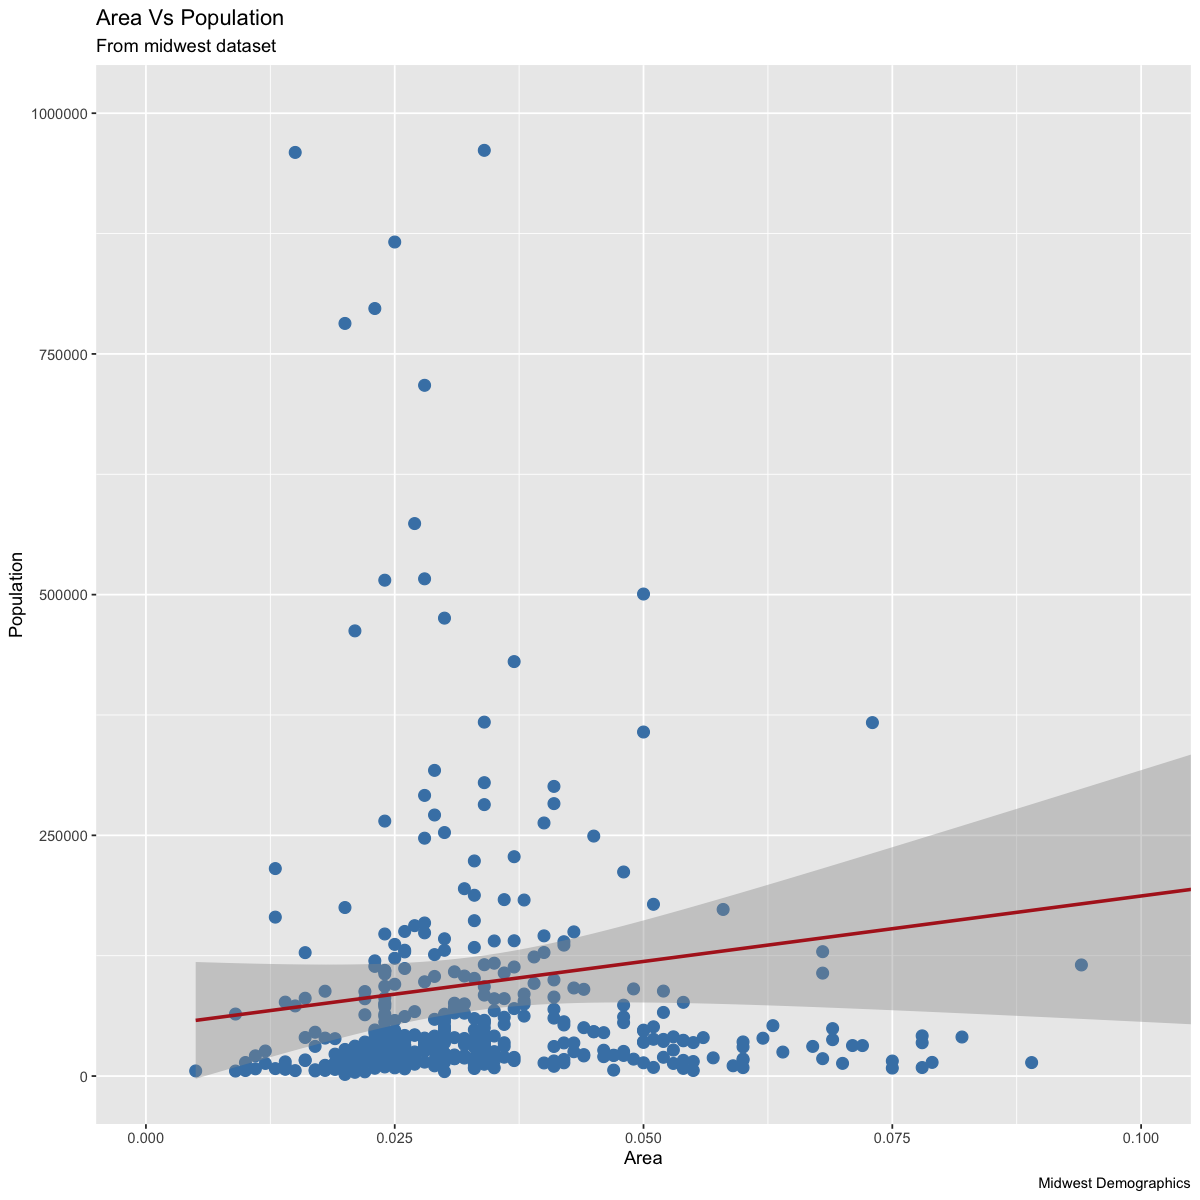

In [22]:
ggplot(midwest, aes(x=area, y=poptotal)) + 
  geom_point(col="steelblue", size=3) +   # Set static color and size for points
  geom_smooth(method="lm", col="firebrick") +  # change the color of line
  coord_cartesian(xlim=c(0, 0.1), ylim=c(0, 1000000)) + 
  labs(title="Area Vs Population", subtitle="From midwest dataset", y="Population", x="Area", 
       caption="Midwest Demographics")

How to Change the Color To Reflect Categories in Another Column?

Suppose if we want the color to change based on another column in the source dataset (midwest), it must be specified inside the aes() function.

`geom_smooth()` using formula 'y ~ x'



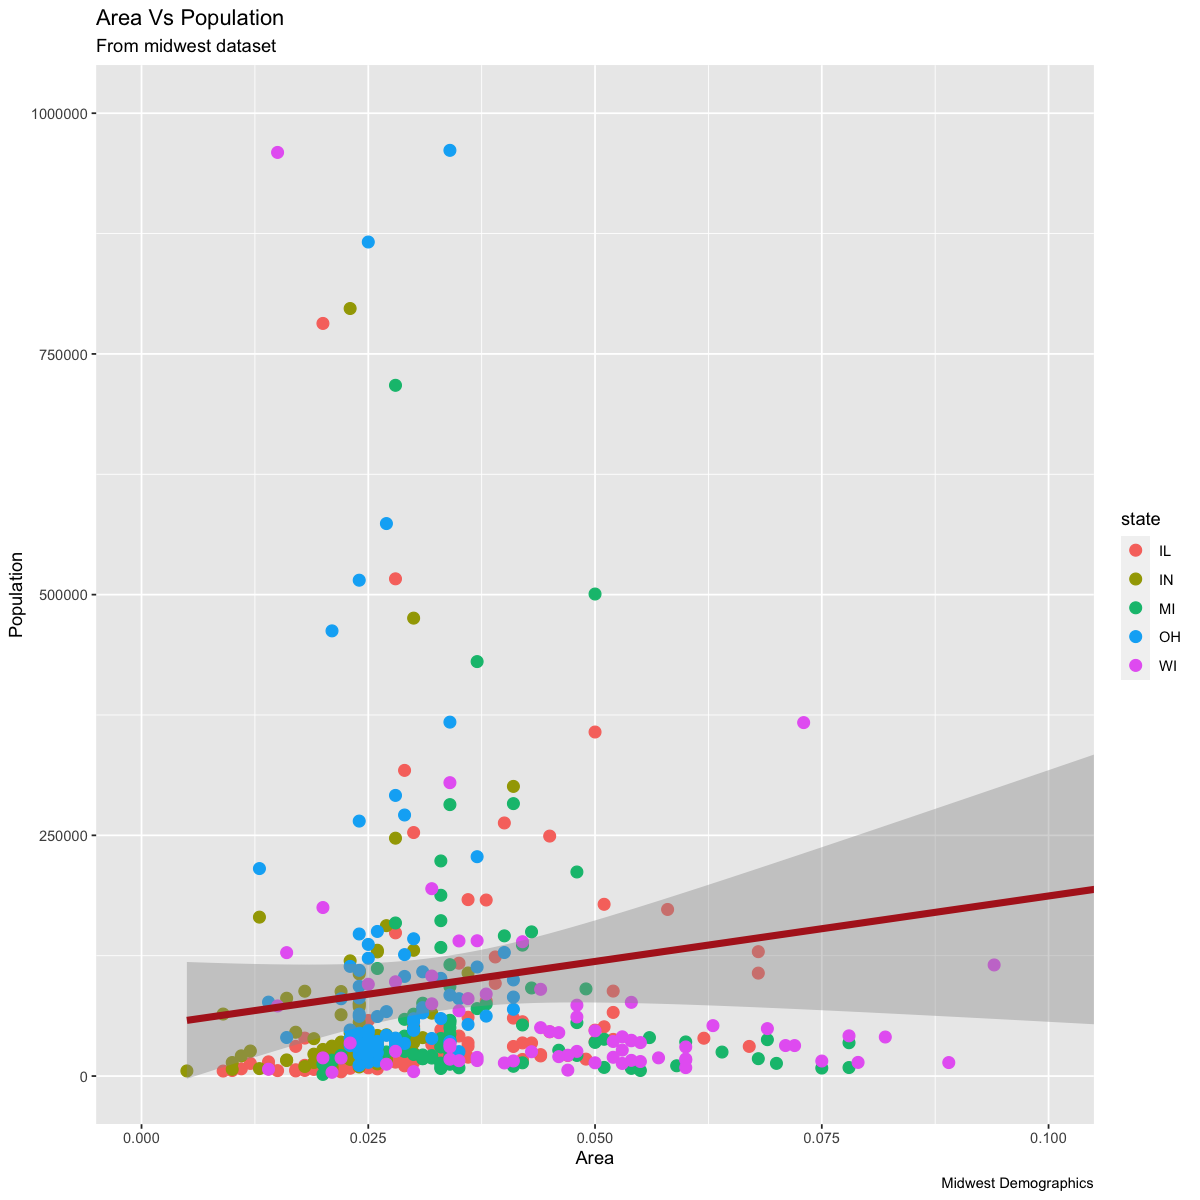

In [23]:
gg <- ggplot(midwest, aes(x=area, y=poptotal)) + 
  geom_point(
      aes(col=state), size=3) +  # Set color to vary based on state categories.
  geom_smooth(method="lm", col="firebrick", size=2) + 
  coord_cartesian(xlim=c(0, 0.1), ylim=c(0, 1000000)) + 
  labs(title="Area Vs Population", subtitle="From midwest dataset", 
       y="Population", x="Area", caption="Midwest Demographics")
plot(gg)

Now each point is colored based on the state it belongs because of aes(col=state). Not just color, but size, shape, stroke (thickness of boundary) and fill (fill color) can be used to discriminate groupings.

As an added benefit, the legend is added automatically. If needed, it can be removed by setting the legend.position to None from within a theme() function.

Now each point is colored based on the state it belongs because of aes(col=state). Not just color, but size, shape, stroke (thickness of boundary) and fill (fill color) can be used to discriminate groupings.

As an added benefit, the legend is added automatically. If needed, it can be removed by setting the legend.position to None from within a theme() function.

gg + theme(legend.position="None")  # remove legend

Also, You can change the color palette entirely.

gg + scale_colour_brewer(palette = "Set1")  # change color palette

More of such palettes can be found in the RColorBrewer package

In [24]:
library(RColorBrewer)
head(brewer.pal.info, 10)  # show 10 palettes

,maxcolors,category,colorblind
,<dbl>,<fct>,<lgl>
BrBG,11,div,TRUE
PiYG,11,div,TRUE
PRGn,11,div,TRUE
PuOr,11,div,TRUE
RdBu,11,div,TRUE
RdGy,11,div,FALSE
RdYlBu,11,div,TRUE
RdYlGn,11,div,FALSE
Spectral,11,div,FALSE


6. How to Change the X Axis Texts and Ticks Location

 This involves two aspects: breaks and labels.

Step 1: Set the breaks

The breaks should be of the same scale as the X axis variable. Note that I am using scale_x_continuous because, the X axis variable is a continuous variable. Had it been a date variable, scale_x_date could be used. Like scale_x_continuous() an equivalent scale_y_continuous() is available for Y axis.

`geom_smooth()` using formula 'y ~ x'



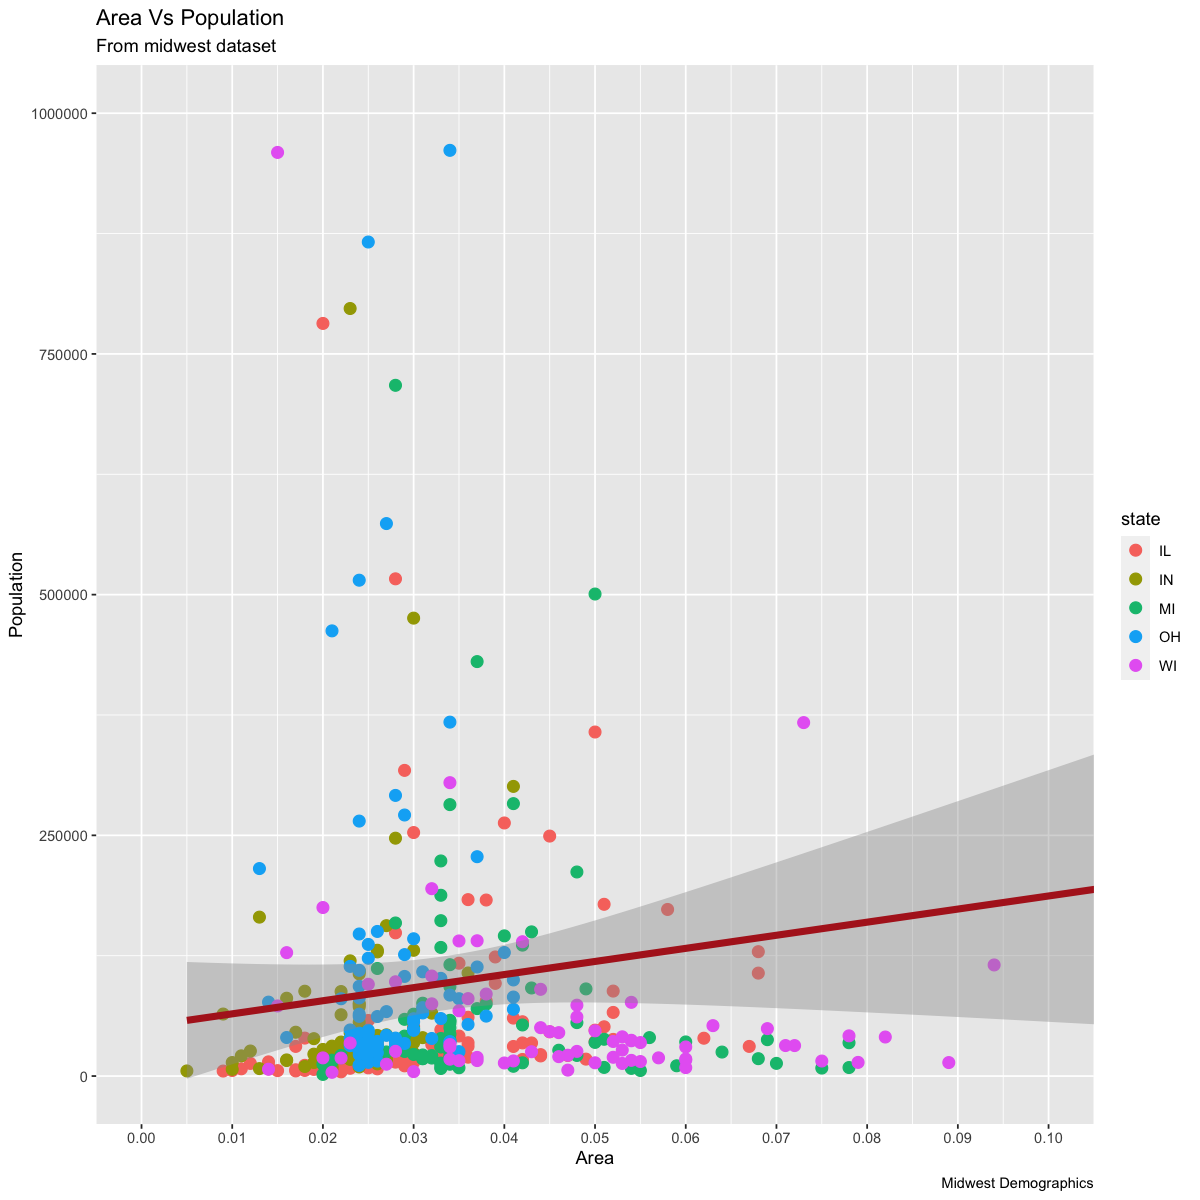

In [25]:
# Base plot
gg <- ggplot(midwest, aes(x=area, y=poptotal)) + 
  geom_point(aes(col=state), size=3) +  # Set color to vary based on state categories.
  geom_smooth(method="lm", col="firebrick", size=2) + 
  coord_cartesian(xlim=c(0, 0.1), ylim=c(0, 1000000)) + 
  labs(title="Area Vs Population", 
       subtitle="From midwest dataset", y="Population", 
       x="Area", caption="Midwest Demographics")

# Change breaks
gg + scale_x_continuous(breaks=seq(0, 0.1, 0.01))

Step 2: Change the labels 

You can optionally change the labels at the axis ticks. labels take a vector of the same length as breaks.
Let me demonstrate by setting the labels to alphabets from a to k (though there is no meaning to it in this context).

`geom_smooth()` using formula 'y ~ x'



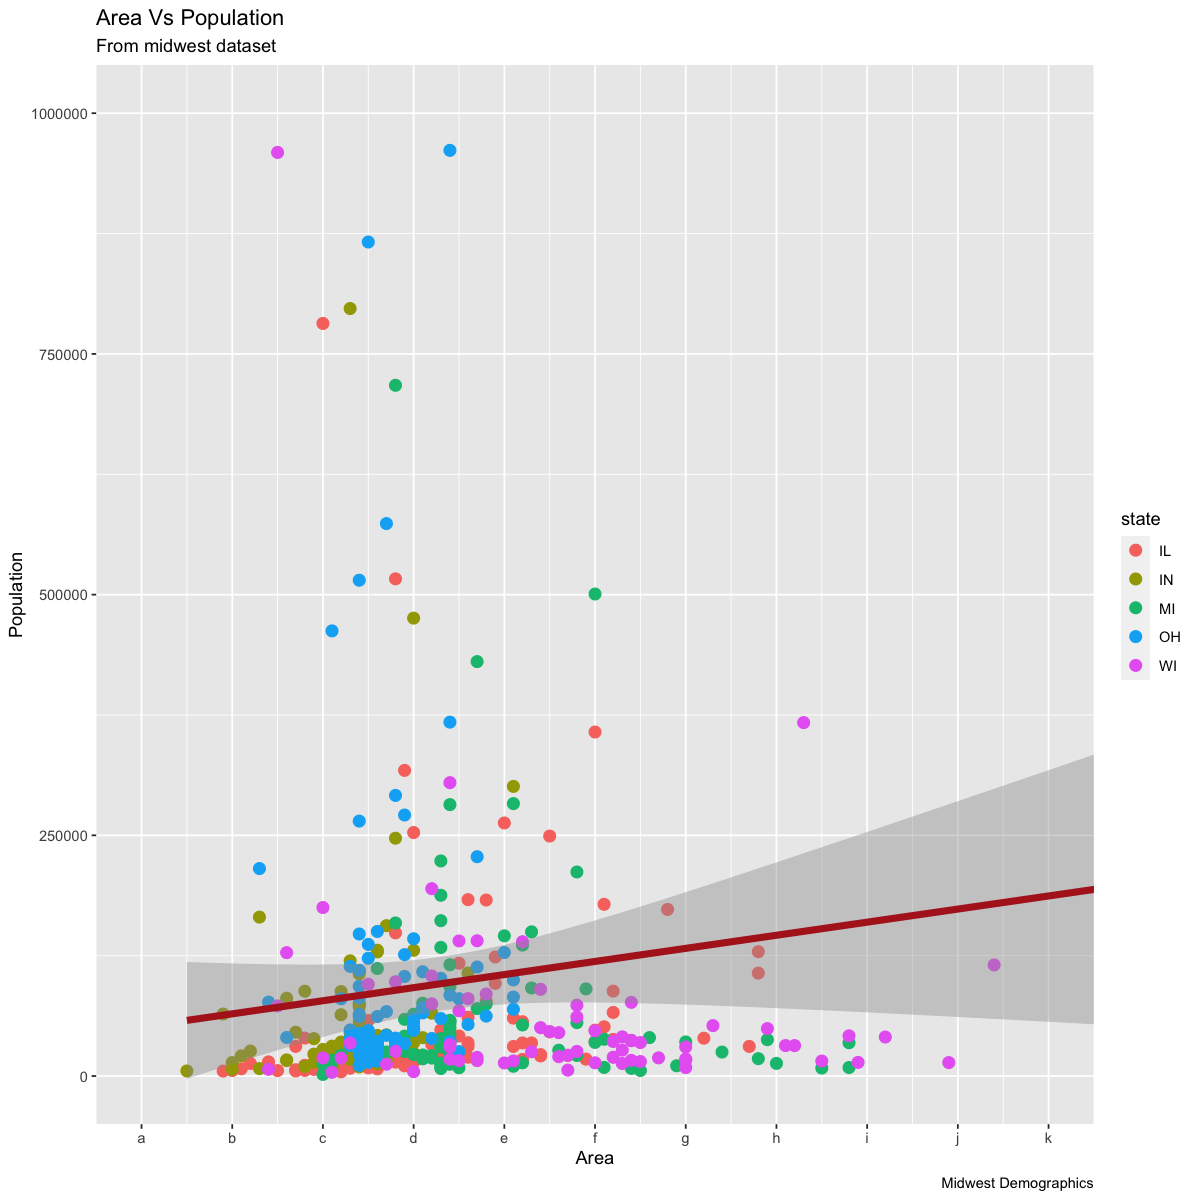

In [26]:
# Base Plot
gg <- ggplot(midwest, aes(x=area, y=poptotal)) + 
  geom_point(aes(col=state), size=3) +  # Set color to vary based on state categories.
  geom_smooth(method="lm", col="firebrick", size=2) + 
  coord_cartesian(xlim=c(0, 0.1), ylim=c(0, 1000000)) + 
  labs(title="Area Vs Population", subtitle="From midwest dataset", y="Population", x="Area", caption="Midwest Demographics")

# Change breaks + label
gg + scale_x_continuous(breaks=seq(0, 0.1, 0.01), labels = letters[1:11])

If you need to reverse the scale, use scale_x_reverse().

`geom_smooth()` using formula 'y ~ x'



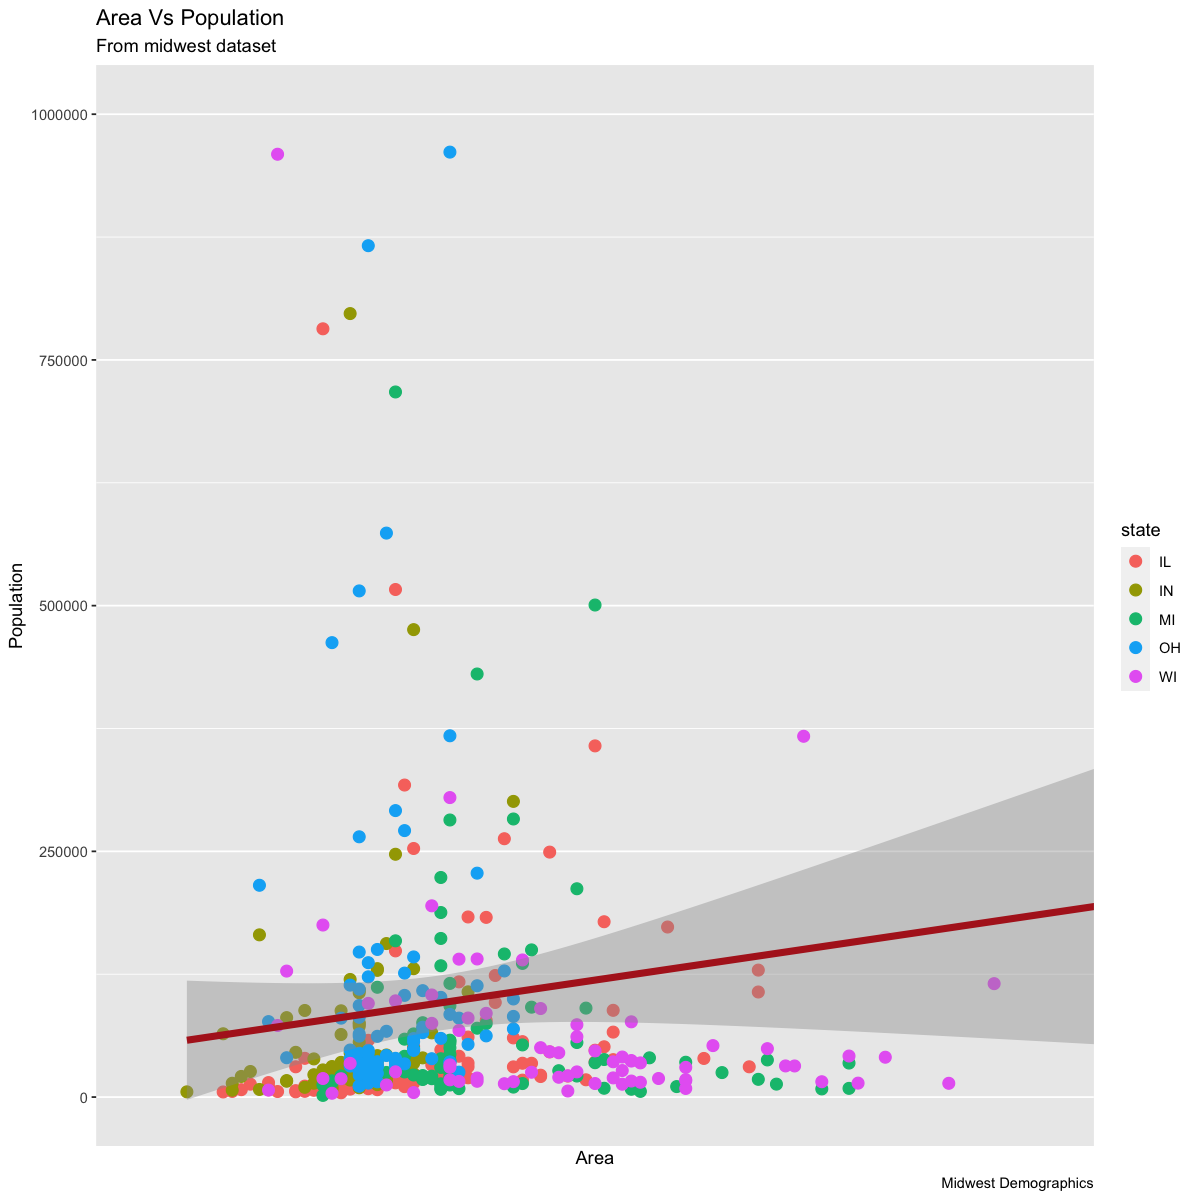

In [27]:
gg <- ggplot(midwest, aes(x=area, y=poptotal)) + 
  geom_point(aes(col=state), size=3) +  # Set color to vary based on state categories.
  geom_smooth(method="lm", col="firebrick", size=2) + 
  coord_cartesian(xlim=c(0, 0.1), ylim=c(0, 1000000)) + 
  labs(title="Area Vs Population", subtitle="From midwest dataset", 
       y="Population", x="Area", caption="Midwest Demographics")

# Reverse X Axis Scale
gg + scale_x_reverse()

How to reverse the axis scales in ggplot2

Write Customized Texts for Axis Labels, by Formatting the Original Values.

Let’s set the breaks for Y axis text as well and format the X and Y axis labels. I have used 2 methods for formatting labels: * Method 1: Using sprintf(). (Have formatted it as % in below example) * Method 2: Using a custom user defined function. (Formatted 1000’s to 1K scale)

Use whichever method feels convenient.

`geom_smooth()` using formula 'y ~ x'



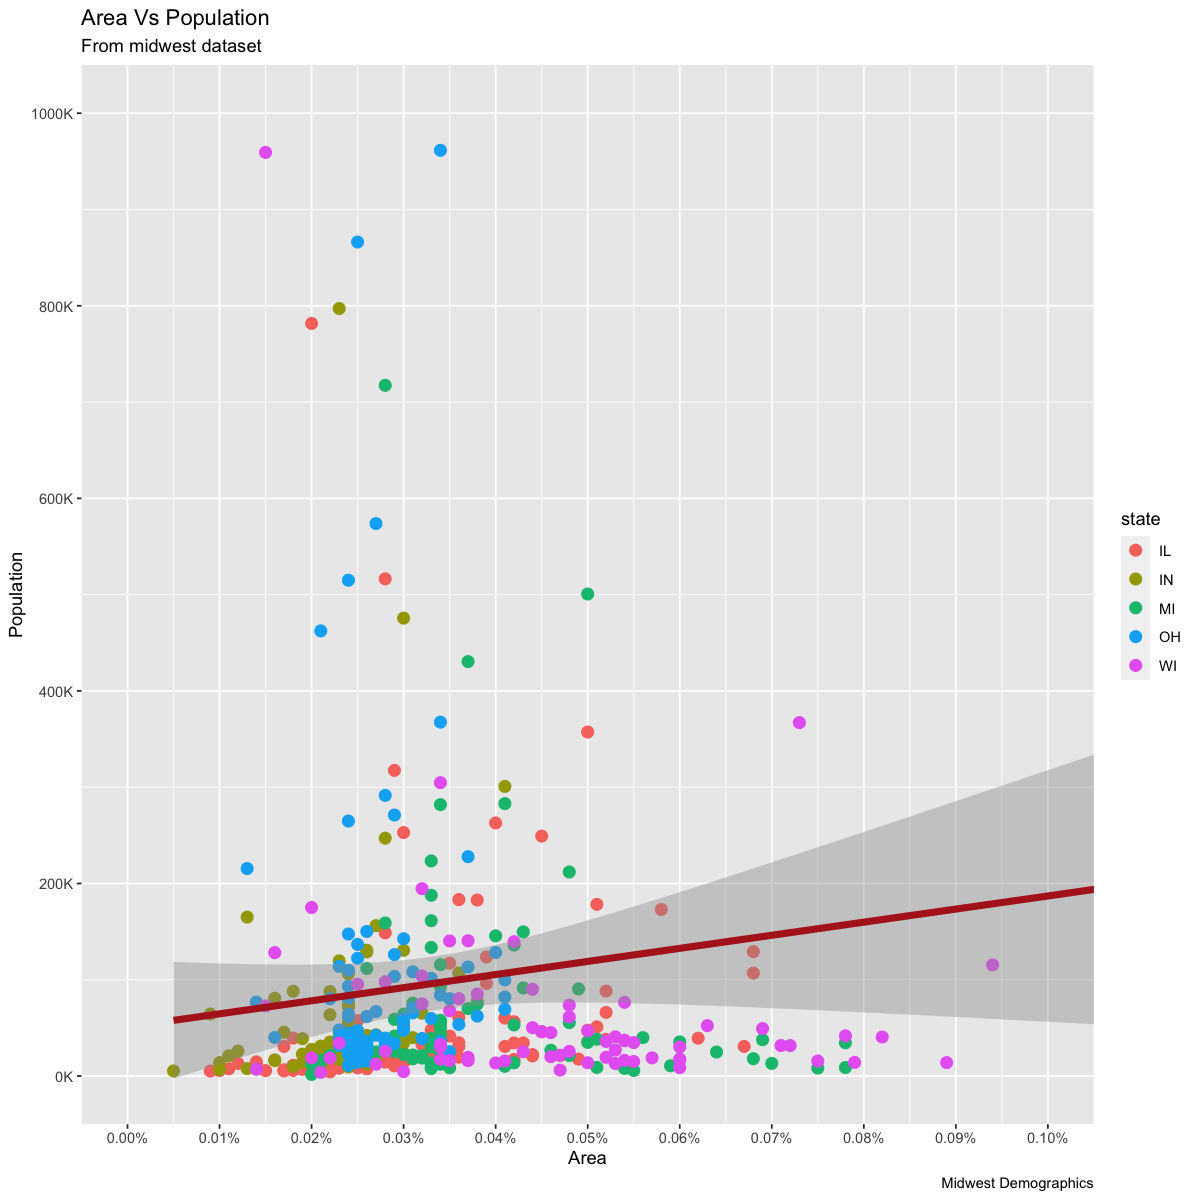

In [28]:
# Base Plot
gg <- ggplot(midwest, aes(x=area, y=poptotal)) + 
  geom_point(aes(col=state), size=3) +  # Set color to vary based on state categories.
  geom_smooth(method="lm", col="firebrick", size=2) + 
  coord_cartesian(xlim=c(0, 0.1), ylim=c(0, 1000000)) + 
  labs(title="Area Vs Population", subtitle="From midwest dataset", y="Population", x="Area",
       caption="Midwest Demographics")

# Change Axis Texts
gg + scale_x_continuous(breaks=seq(0, 0.1, 0.01), labels = sprintf("%1.2f%%", seq(0, 0.1, 0.01))) + 
  scale_y_continuous(breaks=seq(0, 1000000, 200000), labels = function(x){paste0(x/1000, 'K')})

 Customize the Entire Theme in One Shot using Pre-Built Themes

We can change the entire theme itself using pre-built themes. The help page ?theme_bw shows all the available built-in themes.

This again is commonly done in couple of ways. 
 * Use the theme_set() to set the theme before drawing the ggplot. Note that this setting will affect all future plots. 
 * Draw the ggplot and then add the overall theme setting (eg. theme_bw())

In [ ]:
# Base plot
gg <- ggplot(midwest, aes(x=area, y=poptotal)) + 
  geom_point(aes(col=state), size=3) +  # Set color to vary based on state categories.
  geom_smooth(method="lm", col="firebrick", size=2) + 
  coord_cartesian(xlim=c(0, 0.1), ylim=c(0, 1000000)) + 
  labs(title="Area Vs Population", subtitle="From midwest dataset", y="Population", x="Area", caption="Midwest Demographics")

gg <- gg + scale_x_continuous(breaks=seq(0, 0.1, 0.01))

`geom_smooth()` using formula 'y ~ x'



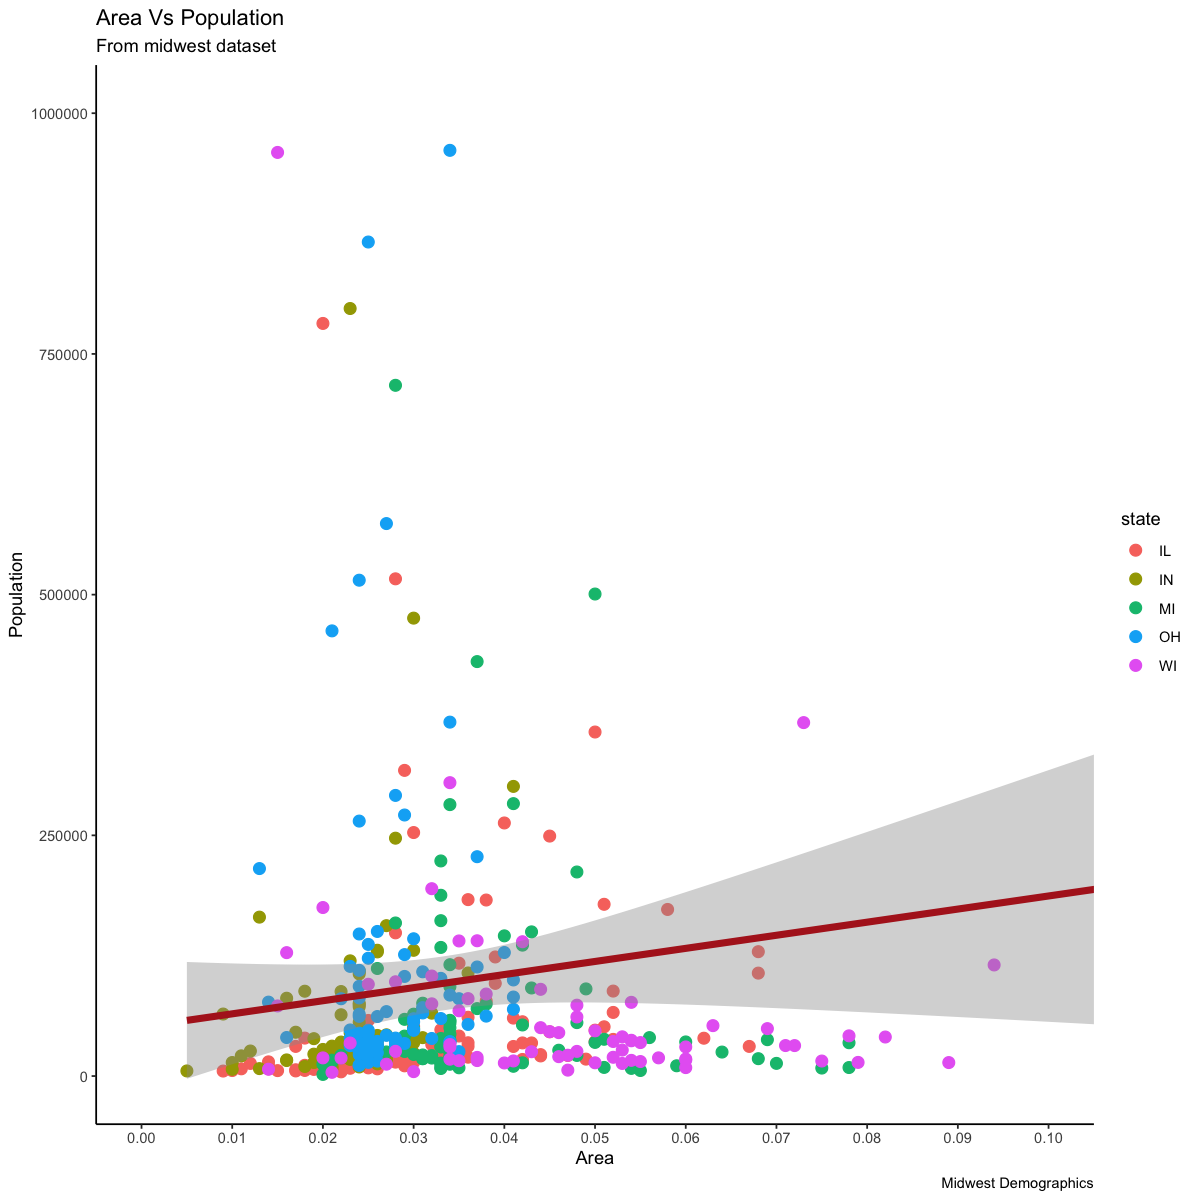

In [31]:
# method 1: Using theme_set()
theme_set(theme_classic())  # not run
gg

`geom_smooth()` using formula 'y ~ x'



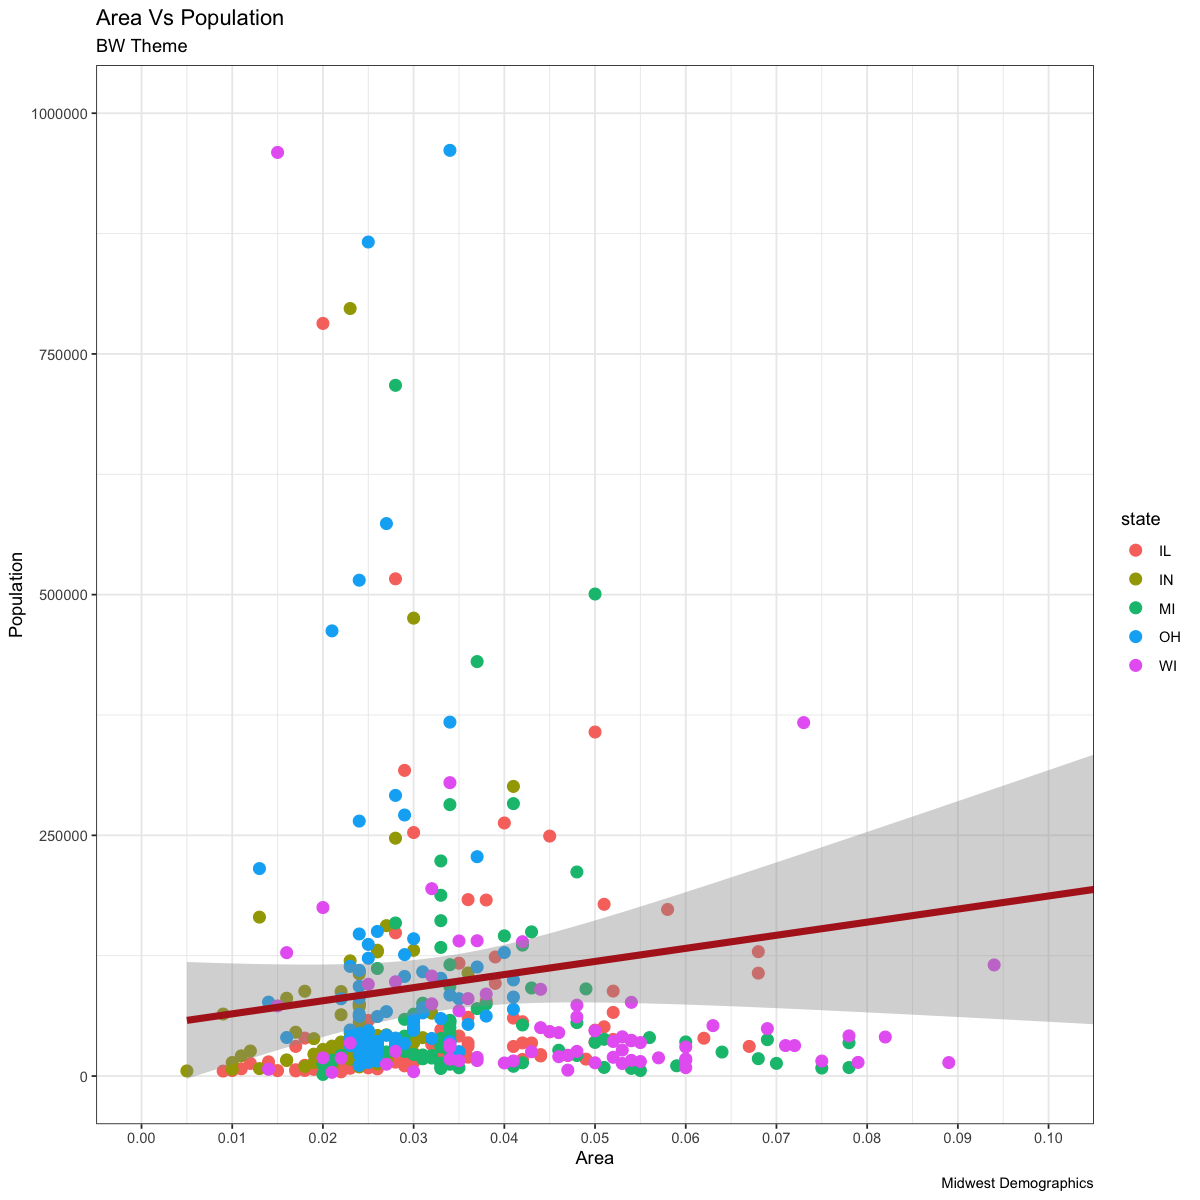

In [33]:
# method 2: Adding theme Layer itself.
gg + theme_bw() + labs(subtitle="BW Theme")

`geom_smooth()` using formula 'y ~ x'



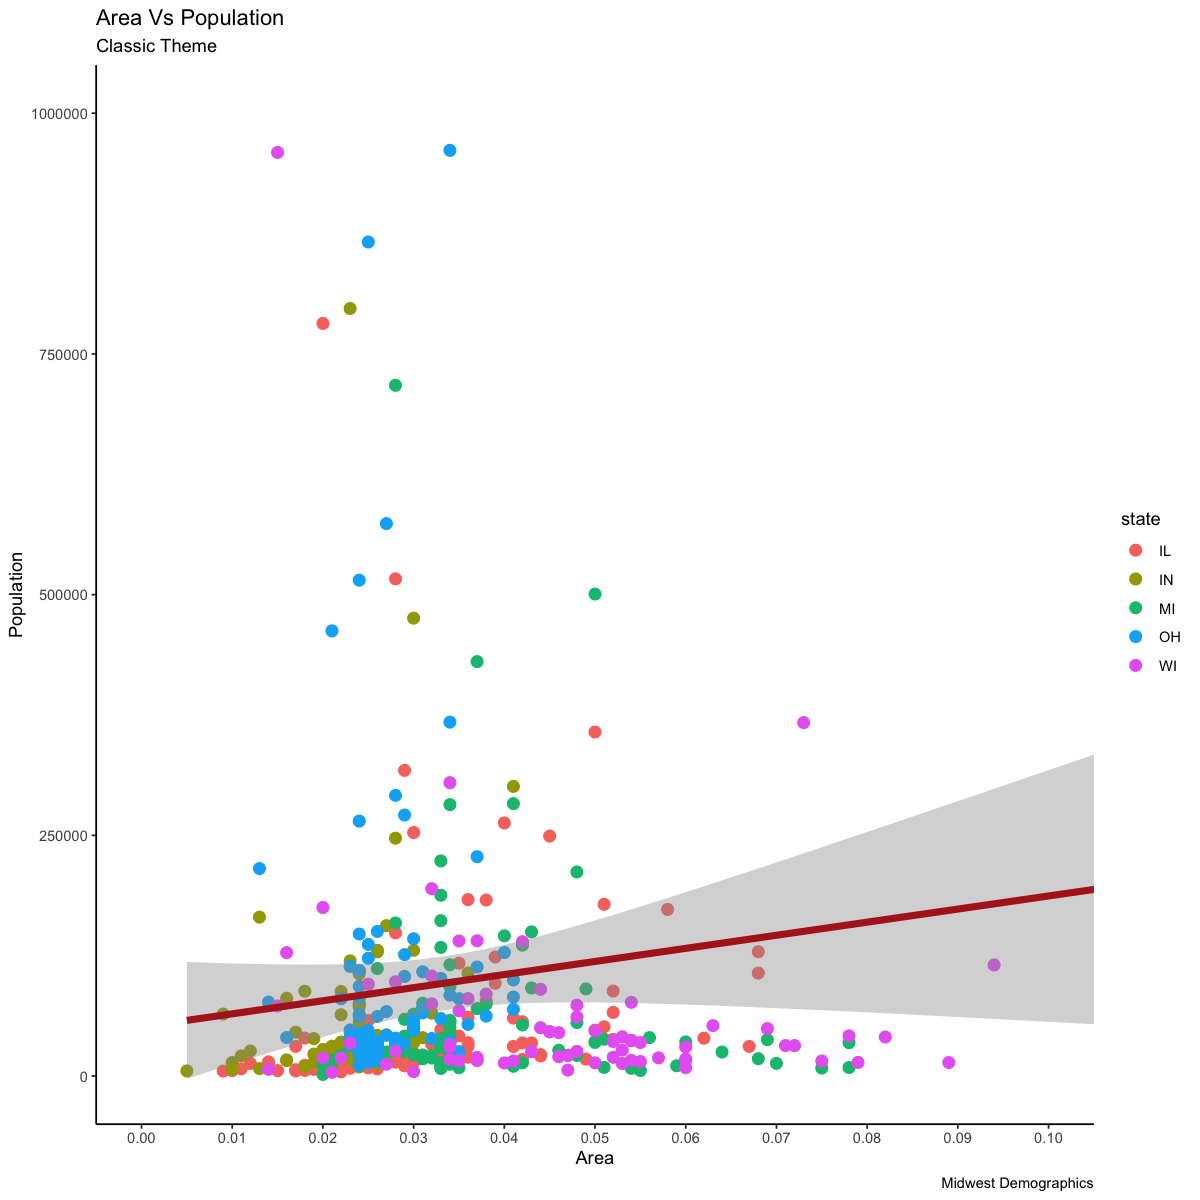

In [32]:
gg + theme_classic() + labs(subtitle="Classic Theme")

For more customized and fancy themes have a look at the ggthemes package and the ggthemr package.